<a href="https://colab.research.google.com/github/khatamirock/colabs_AI_LAB/blob/main/DL_cholle_conv_cats%2Bdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## download from KAGGLE....
### **upload kaggle.json file first ** 

In [ ]:
!pip install -q kaggle
# from google.colab import files
# files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d chetankv/dogs-cats-images

 99% 430M/435M [00:12<00:00, 41.3MB/s]
100% 435M/435M [00:12<00:00, 37.7MB/s]


In [ ]:
!unzip -qq /content/dogs-cats-images.zip

# CODE!!

In [ ]:
import pathlib
import os, shutil, pathlib


original_dir = pathlib.Path("dataset/training_set") 
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index): 
  for category in ("cat", "dog"):
    if category=='cat':
      cat='cats'
    else:cat='dogs'
    dir = new_base_dir / subset_name / category
    print(dir)
    os.makedirs(dir,exist_ok=True)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/cat/ fname,dst=dir / fname)
    

In [ ]:
make_subset("train", start_index=1, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500) 
make_subset("test", start_index=1500, end_index=2500)

cats_vs_dogs_small/train/cat
cats_vs_dogs_small/train/dog
cats_vs_dogs_small/validation/cat
cats_vs_dogs_small/validation/dog
cats_vs_dogs_small/test/cat
cats_vs_dogs_small/test/dog


In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers


inputs = keras.Input(shape=(180, 180, 3)) 
x = layers.Rescaling(1./255)(inputs) 
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()


model.compile(loss="binary_crossentropy",
 optimizer="rmsprop",
 metrics=["accuracy"])




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
 new_base_dir / "train",
 image_size=(180, 180),
 batch_size=32)
validation_dataset = image_dataset_from_directory(
 new_base_dir / "validation",
 image_size=(180, 180),
 batch_size=32)
test_dataset = image_dataset_from_directory(
 new_base_dir / "test",
 image_size=(180, 180),
 batch_size=32)

Found 1998 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np 
import tensorflow as tf
random_numbers = np.random.normal(size=(10, 6))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
# batch_dat=dataset.batch(3) #this makes a group of the input size!!!

In [ ]:
len(dataset),len(dataset.batch(5))


In [ ]:
reshaped_dataset = dataset.map(lambda x: print(x)  )
# len(dataset),len(reshaped_dataset)



In [ ]:
for data_batch, labels_batch in train_dataset:
  # print("data batch shape:", data_batch.shape)
  print("labels batch shape:",labels_batch, labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: tf.Tensor([1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0], shape=(32,), dtype=int32) (32,)


In [ ]:
callbacks = [
 keras.callbacks.ModelCheckpoint(
 filepath="convnet_from_scratch.keras",
 save_best_only=True,
 monitor="val_loss")
]

In [ ]:
history = model.fit(
 train_dataset,
 epochs=30,
 validation_data=validation_dataset,
 callbacks=callbacks)

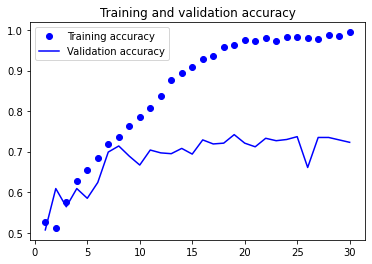

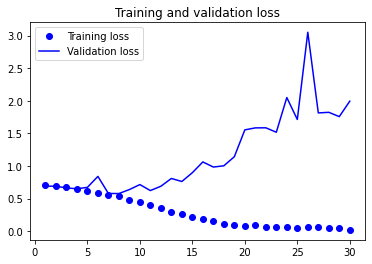

In [ ]:
import matplotlib.pyplot as plt
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# .........................................................
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")

plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")

plt.legend()

# /.......................................

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()










plt.show()

In [ ]:

test_model=keras.models.load_model('convnet_from_scratch.keras')
test_loss,test_acc=test_model.evaluate(test_dataset)
print(f'test acc: {test_acc:.3f}')



63/63 [==============================] - 3s 34ms/step - loss: 0.5829 - accuracy: 0.7050
test acc: 0.705
